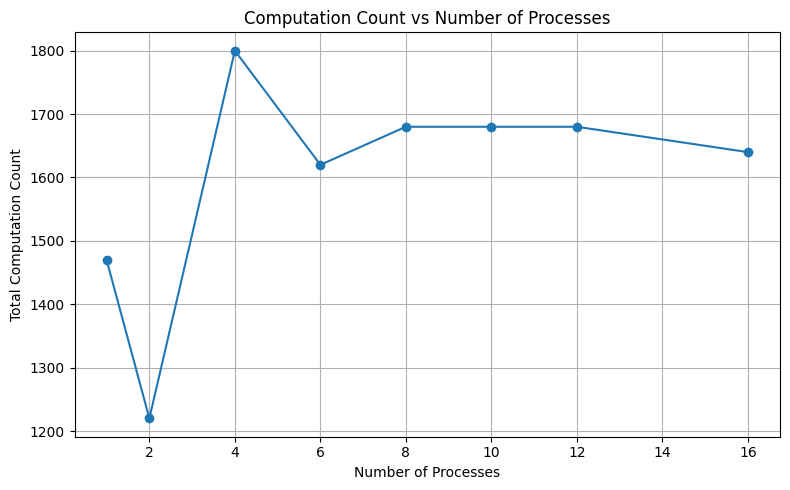


=== Plotting temperature logs for logs_nproc_01 ===


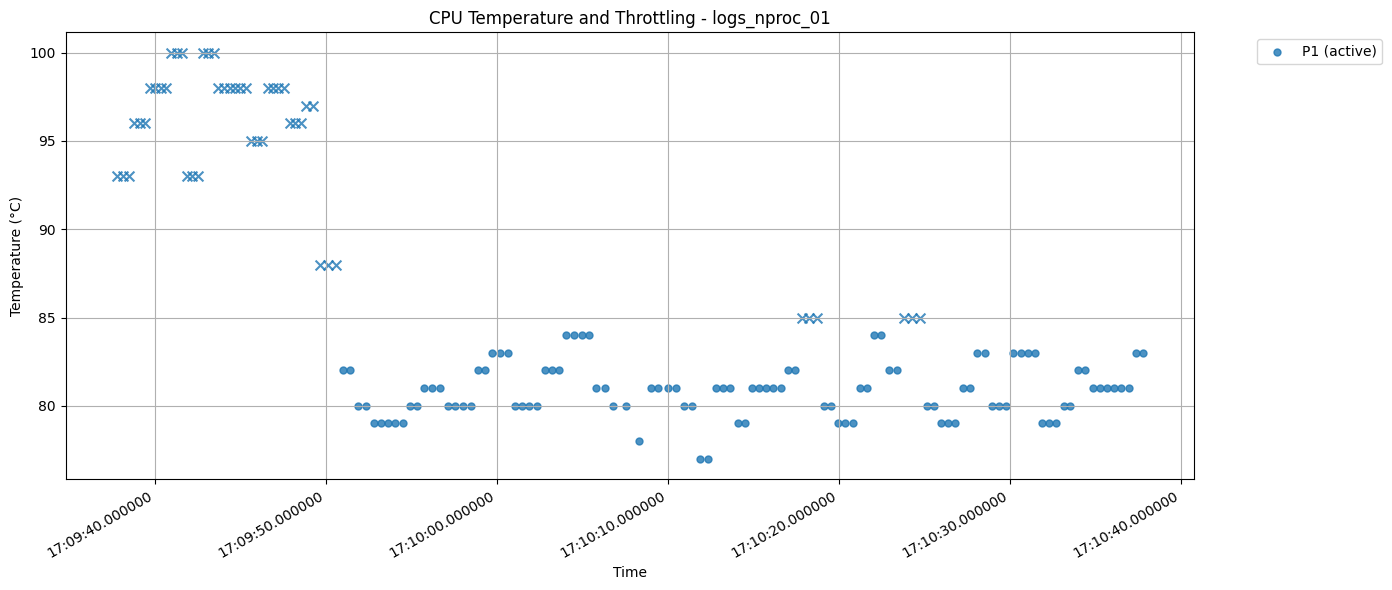


=== Plotting temperature logs for logs_nproc_02 ===


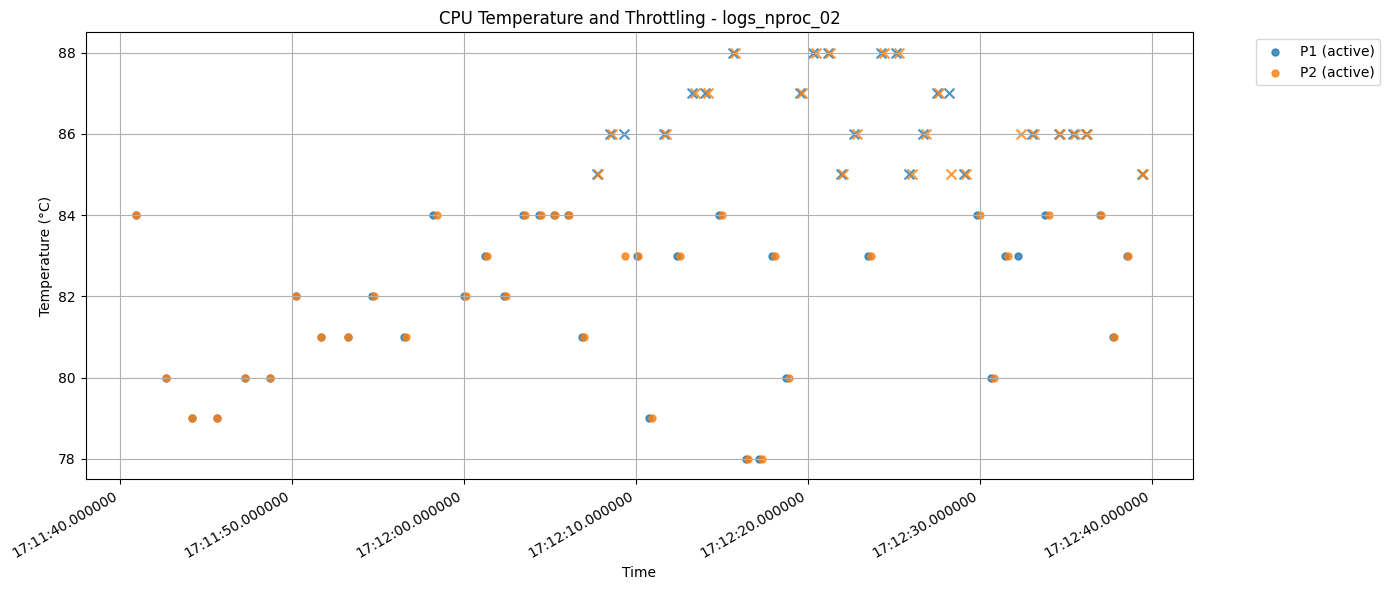


=== Plotting temperature logs for logs_nproc_04 ===


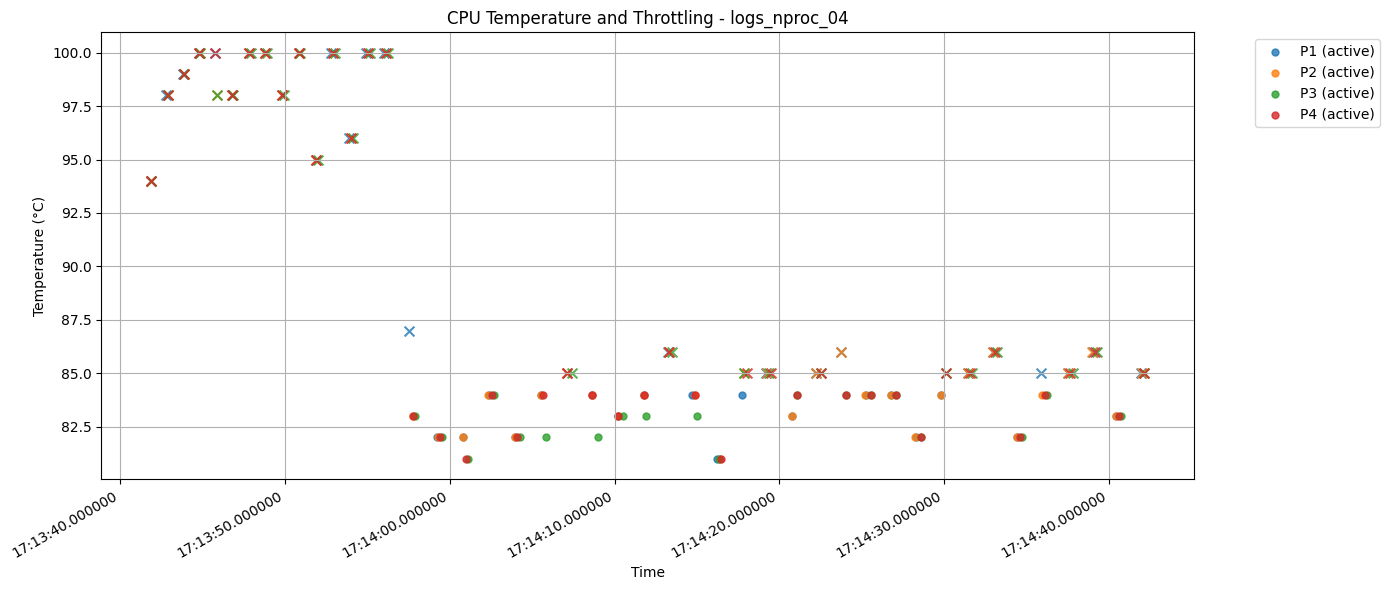


=== Plotting temperature logs for logs_nproc_06 ===


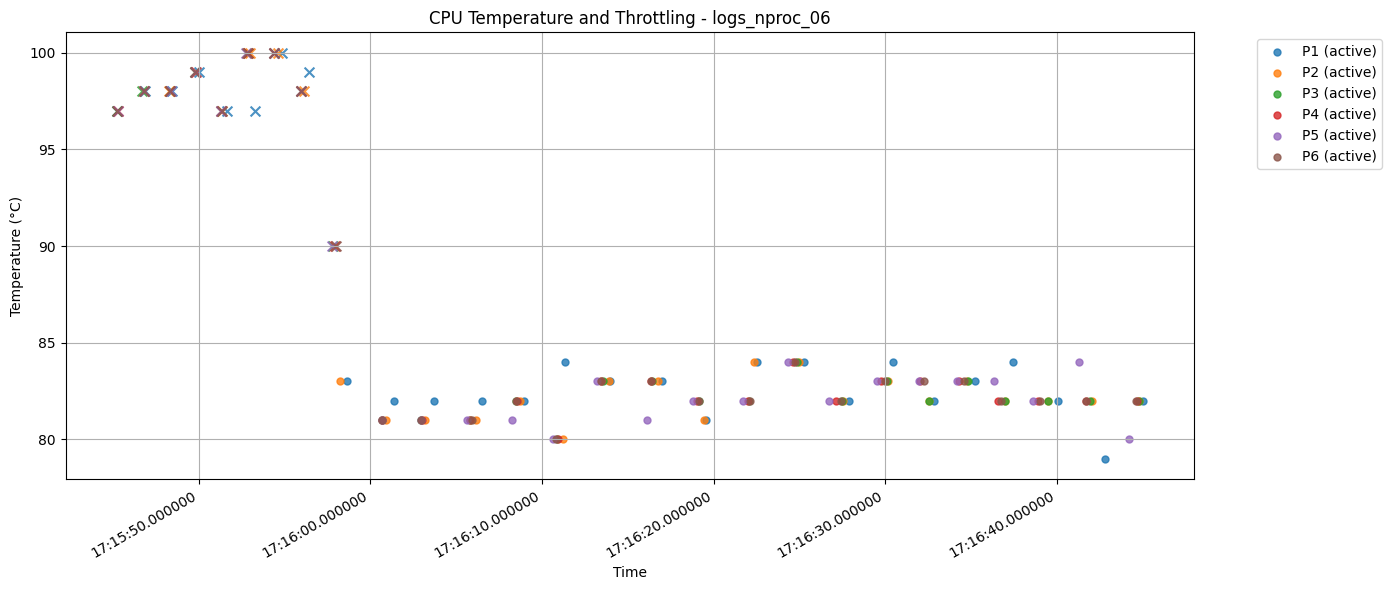


=== Plotting temperature logs for logs_nproc_08 ===


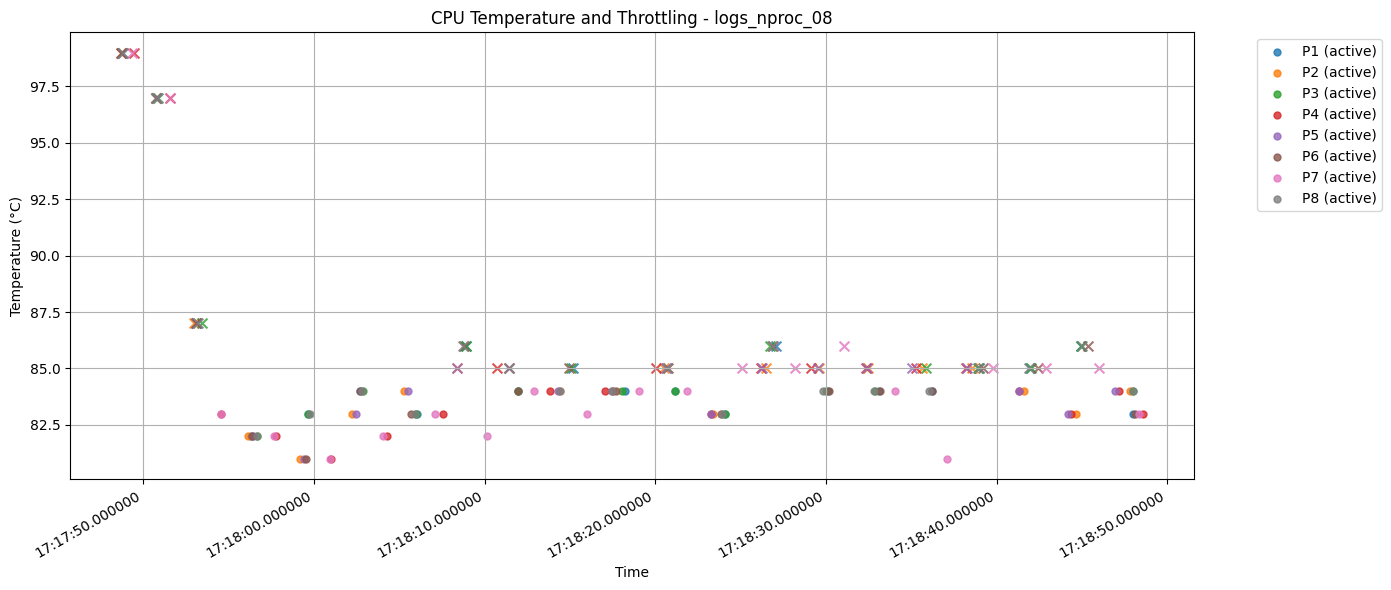


=== Plotting temperature logs for logs_nproc_10 ===


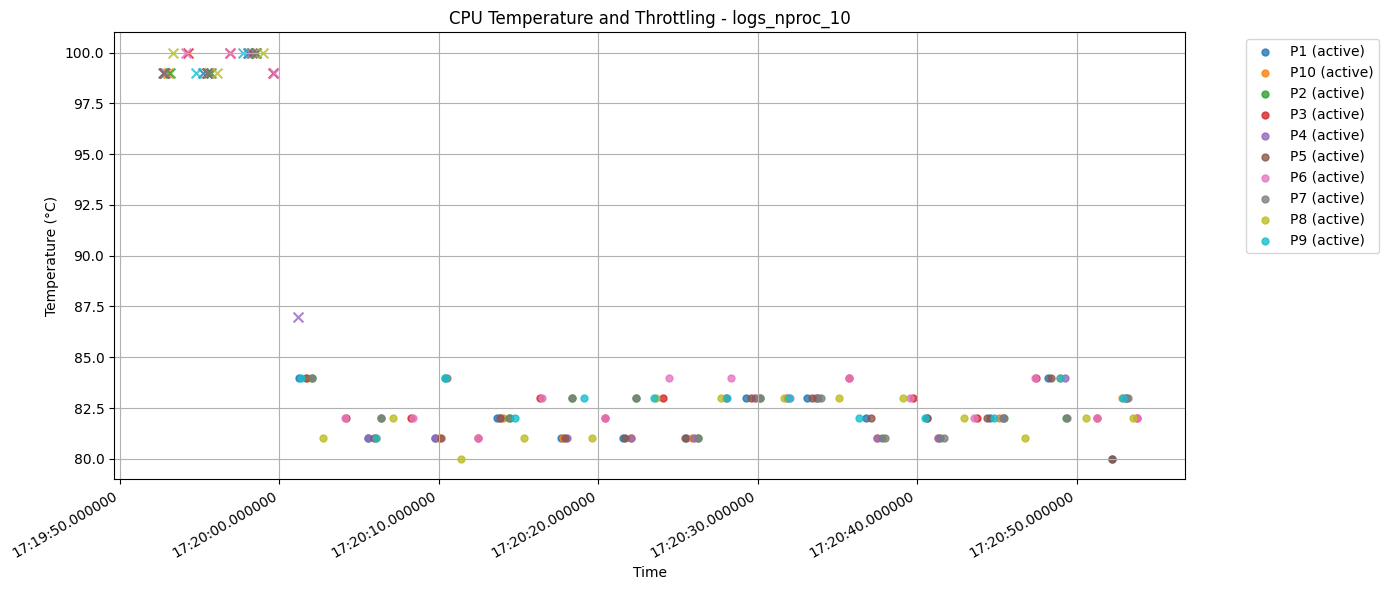


=== Plotting temperature logs for logs_nproc_12 ===


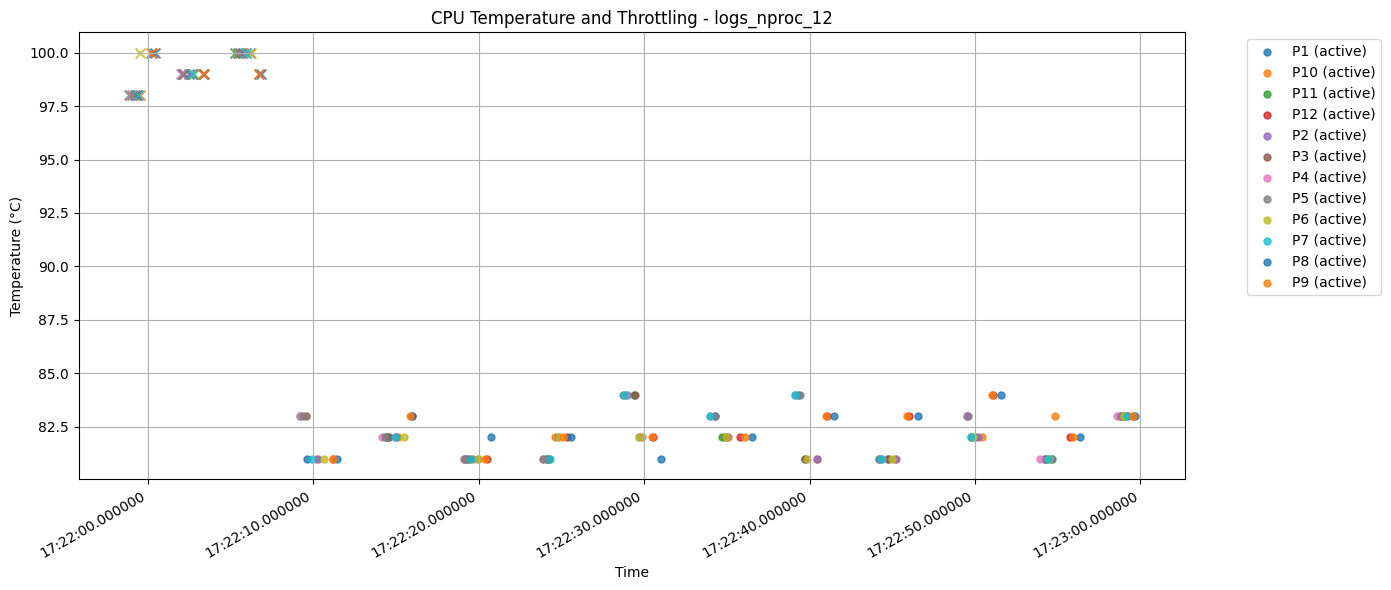


=== Plotting temperature logs for logs_nproc_16 ===


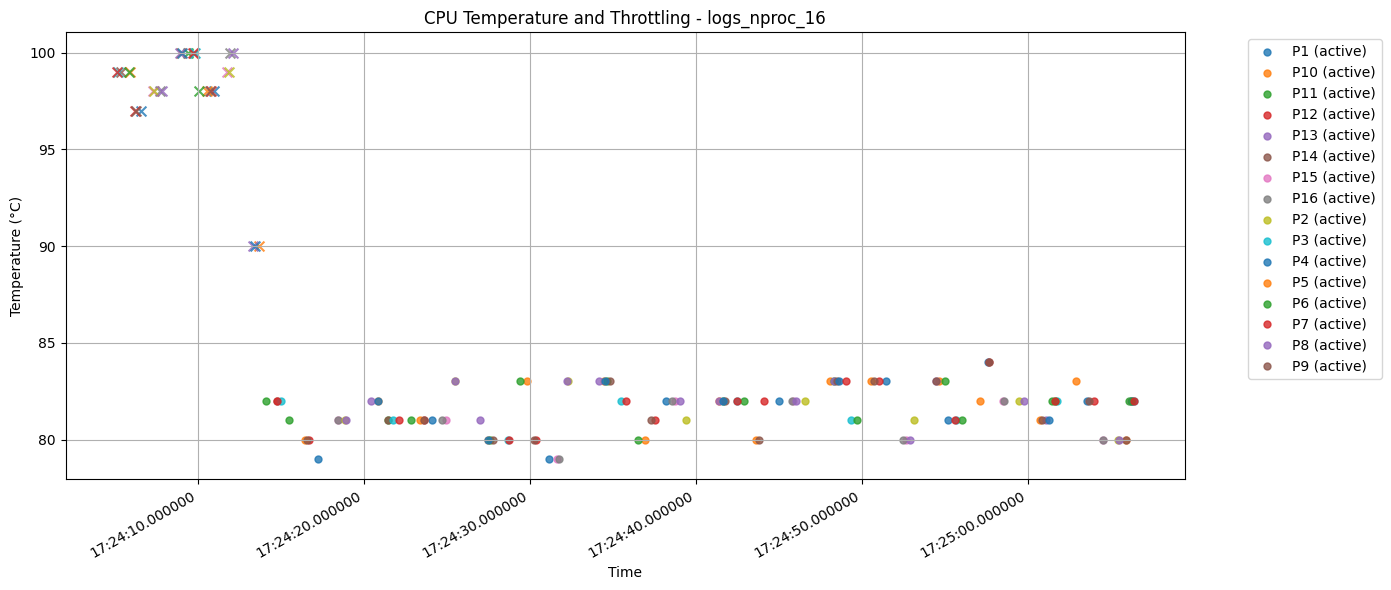

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directory containing log folders like logs_nproc_01, logs_nproc_02, etc.
base_log_dir = "."

# Collect all subdirectories starting with 'logs_nproc_'
log_dirs = sorted([d for d in os.listdir(base_log_dir) if d.startswith("logs_nproc_")])

results = []

for log_dir in log_dirs:
    proc_files = [f for f in os.listdir(log_dir) if f.startswith("log_P") and f.endswith(".csv")]
    total_count = 0

    for fname in proc_files:
        fpath = os.path.join(log_dir, fname)
        try:
            df = pd.read_csv(fpath)
            total = df["count"].iloc[-1] if not df.empty else 0
            total_count += total
        except Exception as e:
            print(f"Failed to read {fpath}: {e}")

    # Extract number of processes from directory name
    try:
        proc_num = int(log_dir.split("_")[-1])
        results.append((proc_num, total_count))
    except:
        continue

# Sort by process count
results.sort()

# Plot results
x = [r[0] for r in results]
y = [r[1] for r in results]

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker="o")
plt.title("Computation Count vs Number of Processes")
plt.xlabel("Number of Processes")
plt.ylabel("Total Computation Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: show temperature plot for each log folder
from plot_logs import plot_logs

for log_dir in log_dirs:
    print(f"\n=== Plotting temperature logs for {log_dir} ===")
    plot_logs(log_dir)